In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

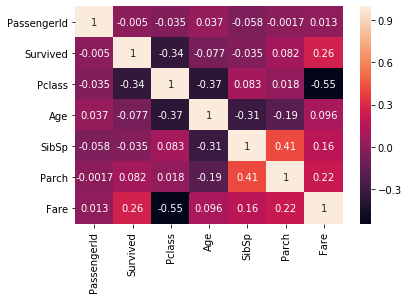

In [3]:
train.corr()
sns.heatmap(train.corr(), annot=True);

We can see that 'Survived' has high correlation with 'Pclass'(0.34) and 'Fare'(0.26)

We can concluded that;

- the more money passengers pay, the higher probability of survival they have
- the lower class passengers belongs to, the lowest probability of survival they have

# MISSING VALUES

In [4]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can see that 'Age', 'Cabin', 'Fare' and 'Embarked' features have null values,
- It is easy to fill Fare and Embarked because there are only 3 null values
- I think that Age is important feature for predict so we have to fill it logically
- I am not sure Cabin feature is important or not and there are many null values so we can explore it.

In [5]:
# fill 'Fare' and 'Embarked'

print(train['Embarked'].value_counts())
train[train['Embarked'].isnull()]

# We can see that we can fill two null values with 'S'

S    644
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
train['Embarked'].fillna('S', inplace=True)
print(train['Embarked'].value_counts())
print(train['Embarked'].isnull().sum())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
0


In [7]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
# we can fill with Fare(mean) in Pclass = 3

test['Fare'].fillna(test.loc[(test['Pclass'] == 3),'Fare'].mean(), inplace=True)
print([test['Fare'].isnull().sum()])

[0]


# Null values in 'Age' feature

In [9]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
train.groupby(['Survived','Sex'])[['Age']].agg([np.mean,'std','count'])

# I want to fill Age values randomly, we can see from table that females who survived ages between (mean-std) (mean+std) 
# so we can fill null values randomly between two numbers 

Age                 
                      mean        std count
Survived Sex                               
0        female  25.046875  13.618591    64
         male    31.618056  14.056019   360
1        female  28.847716  14.175073   197
         male    27.276022  16.504803    93

In [11]:
# To learn how many null values in these groups I am doing this

train["Age"] = train["Age"].fillna(-0.5)

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train["Age_categories"] = pd.cut(train["Age"],cut_points,labels=label_names)

train.groupby(['Survived','Sex','Age_categories'])[['Age']].agg([np.mean,'count'])

Age      
                                     mean count
Survived Sex    Age_categories                 
0        female Missing         -0.500000    17
                Infant           2.200000     5
                Child            8.875000     8
                Teenager        16.833333     9
                Young Adult     25.788462    26
                Adult           43.687500    16
         male   Missing         -0.500000   108
                Infant           2.500000     8
                Child            9.000000     8
                Teenager        16.806452    31
                Young Adult     26.210256   195
                Adult           44.910891   101
                Senior          66.029412    17
1        female Missing         -0.500000    36
                Infant           3.156250    16
                Child            7.000000     3
                Teenager        16.185185    27
                Young Adult     27.111702    94
                Adult           45.148148    54
                Senior          62.666667     3
         male   Missing         -0.500000    16
                Infant           1.911333    15
                Child            9.166667     6
                Teenager        17.000000     3
                Young Adult     27.697674    43
                Adult           44.541667    24
                Senior          71.000000     2

In [12]:
rand_age1 = np.random.randint(25.046875 - 13.618591, 25.046875 + 13.618591, size = 17)
rand_age2 = np.random.randint(31.618056 - 14.056019, 31.618056 + 14.056019, size = 108)
rand_age3 = np.random.randint(28.847716 - 14.175073, 28.847716 + 14.175073, size = 36)
rand_age4 = np.random.randint(27.276022 - 16.504803, 27.276022 + 16.504803, size = 16)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)
rand_age3 = list(rand_age3)
rand_age4 = list(rand_age4)

In [13]:
train.loc[(train['Sex'] == 'female') & (train['Survived'] == 0) & (train['Age'] == -0.5),'Age'] = rand_age1
train.loc[(train['Sex'] == 'male') & (train['Survived'] == 0) & (train['Age'] == -0.5), 'Age'] = rand_age2
train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1) & (train['Age'] == -0.5),'Age'] = rand_age3
train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1) & (train['Age'] == -0.5), 'Age'] = rand_age4

In [14]:
test.groupby(['Sex'])[['Age']].agg([np.mean,'std','count'])

Age                 
             mean        std count
Sex                               
female  30.272362  15.428613   127
male    30.272732  13.389528   205

In [15]:
test["Age"] = test["Age"].fillna(-0.5)
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
test["Age_categories"] = pd.cut(test["Age"],cut_points,labels=label_names)
test.groupby(['Sex','Age_categories'])[['Age']].agg([np.mean,'count'])

Age      
                            mean count
Sex    Age_categories                 
female Missing         -0.500000    25
       Infant           1.298571     7
       Child           10.200000     5
       Teenager        17.250000    12
       Young Adult     25.620968    62
       Adult           46.540541    37
       Senior          66.750000     4
male   Missing         -0.500000    61
       Infant           1.782000     5
       Child            7.937500     8
       Teenager        16.147059    17
       Young Adult     25.963964   111
       Adult           44.535088    57
       Senior          62.642857     7

In [16]:
rand_age1 = np.random.randint(30.272362 - 15.428613, 30.272362 + 15.428613, size = 25)
rand_age2 = np.random.randint(30.272732 - 13.389528, 30.272732 + 13.389528, size = 61)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)

test.loc[(test['Sex'] == 'female') & (test['Age'] == -0.5), 'Age'] = rand_age1
test.loc[(test['Sex'] == 'male') & (test['Age'] == -0.5), 'Age'] = rand_age2

In [17]:
# now we can drop age_categories

train.drop('Age_categories', axis=1, inplace=True)
test.drop('Age_categories', axis=1, inplace=True)

# CABIN

In [18]:
train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

test["Cabin_type"] = test["Cabin"].str[0]
test["Cabin_type"] = test["Cabin_type"].fillna("Unknown")

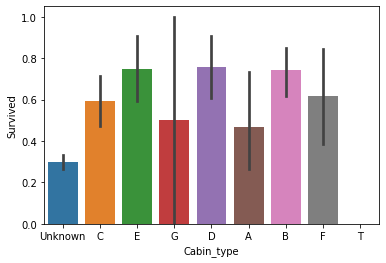

In [19]:
sns.barplot(x = 'Cabin_type',y ='Survived',data=train);

### After looking plot I am thinking that 'Cabin' feature is not important to predict Survived I decided to drop it

In [20]:
train.drop(['Cabin','Cabin_type'], axis=1, inplace=True)
test.drop(['Cabin','Cabin_type'], axis=1, inplace=True)

In [21]:
# finally end of fill null values

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# checking the other columns

In [22]:
# I think Ticket feature is not necessary for us so we can drop them.

train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

 # create new fature from NAME

In [23]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

In [24]:
train['Title'] = train['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [25]:
test['Title'] = test['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [26]:
# now we can drop NAME

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# creat a new feature about family size because SibSp and Parch feature are about same meaning so if we merge them we can creat family size feature

In [27]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [28]:
# Now we dont need SibSp and Parch and drop them

train.drop(['SibSp','Parch'], axis=1, inplace=True)
test.drop(['SibSp','Parch'], axis=1, inplace=True)

# CONVERTE CATEGORICAL FEATURES TO NUMERICAL VALUES BECAUSE OF MACHINE LEARNING ALGORITM

- categorical features are Pclass, Sex, Embarked, Title

- There are two options for categorical values to numerical, one hot encoding and label encoding, one hot is good for nominal variables and label is good for ordinal variables

- All of them is nominal here so we can apply one hot encoding but sex has two categori so we have to apply label encoder for it

In [29]:
# We can apply one hot encoding method to ['Pclass','Sex','Embarked','Title'] 

train = pd.get_dummies(train, columns = ['Pclass','Embarked','Title'],prefix=['Pc','',''])
test = pd.get_dummies(test, columns = ['Pclass','Embarked','Title'],prefix=['Pc','',''])

In [30]:
from sklearn import preprocessing

lbe = preprocessing.LabelEncoder()
train["Sex"] = lbe.fit_transform(train["Sex"])
test["Sex"] = lbe.fit_transform(test["Sex"])

In [31]:
train.head()

,PassengerId,Survived,Sex,Age,Fare,Family_Size,Pc_1,Pc_2,Pc_3,_C,_Q,_S,_Master,_Miss,_Mr,_Mrs,_Rare,_Royal
0,1,0,1,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0,0
1,2,1,0,38.0,71.2833,2,1,0,0,1,0,0,0,0,0,1,0,0
2,3,1,0,26.0,7.9250,1,0,0,1,0,0,1,0,1,0,0,0,0
3,4,1,0,35.0,53.1000,2,1,0,0,0,0,1,0,0,0,1,0,0
4,5,0,1,35.0,8.0500,1,0,0,1,0,0,1,0,0,1,0,0,0


In [32]:
test.head()

,PassengerId,Sex,Age,Fare,Family_Size,Pc_1,Pc_2,Pc_3,_C,_Q,_S,_Master,_Miss,_Mr,_Mrs,_Rare
0,892,1,34.5,7.8292,1,0,0,1,0,1,0,0,0,1,0,0
1,893,0,47.0,7.0000,2,0,0,1,0,0,1,0,0,0,1,0
2,894,1,62.0,9.6875,1,0,1,0,0,1,0,0,0,1,0,0
3,895,1,27.0,8.6625,1,0,0,1,0,0,1,0,0,1,0,0
4,896,0,22.0,12.2875,3,0,0,1,0,0,1,0,0,0,1,0


In [33]:
# we can see there is no ROYAL column in test data so we have to add 

test['_Royal'] = 0

**MACHINE LEARNING**

In [34]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

## This dataset is not big so to split train and validation set is not good solution, to aplly cross validation is necessary but to see difference I will do both of them

### 1) split data

In [35]:
def base_models(df):
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    X = df.drop(['Survived', 'PassengerId'], axis=1)
    Y = df["Survived"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
    
    #results = []
    
    names = ["LogisticRegression","GaussianNB","KNN","LinearSVC","SVC",
             "CART","RF","GBM","XGBoost","LightGBM","CatBoost"]
    
    
    classifiers = [LogisticRegression(),GaussianNB(), KNeighborsClassifier(),LinearSVC(),SVC(),
                  DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(),
                  XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose = False)]
    
    
    for name, clf in zip(names, classifiers):

        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        msg = "%s: %f" % (name, acc)
        print(msg)

In [36]:
base_models(train)

LogisticRegression: 0.815642
GaussianNB: 0.759777
KNN: 0.703911
LinearSVC: 0.815642
SVC: 0.659218
CART: 0.782123
RF: 0.837989
GBM: 0.832402
XGBoost: 0.837989
LightGBM: 0.854749
CatBoost: 0.826816


### 2) cross validation

In [37]:
def base_models_cv(df):
    
    from sklearn.model_selection import cross_val_score, KFold 
    
    X = df.drop(['Survived', 'PassengerId'], axis=1)
    Y = df["Survived"]
    
    results = []
    A = []
    
    names = ["LogisticRegression","GaussianNB","KNN","LinearSVC","SVC",
             "CART","RF","GBM","XGBoost","LightGBM","CatBoost"]
    
    
    classifiers = [LogisticRegression(),GaussianNB(), KNeighborsClassifier(),LinearSVC(),SVC(),
                  DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(),
                  XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose = False)]
    
    
    for name, clf in zip(names, classifiers):
        
        kfold = KFold(n_splits=10, random_state=1001)
        cv_results = cross_val_score(clf, X, Y, cv = kfold, scoring = "accuracy")
        results.append(cv_results)
        A.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean() , cv_results.std())
        print(msg)

In [38]:
base_models_cv(train)

LogisticRegression: 0.831673 (0.037481)
GaussianNB: 0.803708 (0.051352)
KNN: 0.713920 (0.052129)
LinearSVC: 0.785730 (0.060741)
SVC: 0.680225 (0.040300)
CART: 0.784619 (0.046356)
RF: 0.804806 (0.051764)
GBM: 0.826080 (0.034643)
XGBoost: 0.798052 (0.047784)
LightGBM: 0.814869 (0.038670)
CatBoost: 0.828365 (0.046718)


### 3) Hyperparameter optimization for 10 ML algoritma and select best one

In [39]:
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train["Survived"]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [41]:
models = [LogisticRegression(),
          GaussianNB(), 
          KNeighborsClassifier(),
          SVC(probability=True),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          XGBClassifier(),
          LGBMClassifier(),
          CatBoostClassifier(verbose = False)]

names = ["LogisticRegression",
         "GaussianNB",
         "KNeighborsClassifier",
         "SVC",
         "DecisionTreeClassifier",
         "RandomForestClassifier",
         "GradientBoostingClassifier",
         "XGBClassifier",
         "LGBMClassifier",
         "CatBoostClassifier"]
    
logreg_params = {"C":np.logspace(-1, 1, 10),
                 "penalty": ["l1","l2"],
                 "solver":['newton-cg','lbfgs','liblinear','sag','saga'],
                 "max_iter":[1000]}
    
NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}

knn_params = {"n_neighbors":np.linspace(1,19,10, dtype = int).tolist(),
                 "weights":["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

svc_params = {"kernel":["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}

dtree_params = {"min_samples_split" : range(10,500,20),
                    "max_depth": range(1,20,2)}

rf_params = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[50,100,150],
                 "criterion":["gini","entropy"]}

gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
                  "n_estimators": [100,500,100],
                  "max_depth": [3,5,10],
                  "min_samples_split": [2,5,10]}

lgbm_params = {'n_estimators': [100, 500, 1000, 2000],
               'subsample': [0.6, 0.8, 1.0],
               'max_depth': [3, 4, 5,6],
               'learning_rate': [0.1,0.01,0.02,0.05],
               "min_child_samples": [5,10,20]}

catb_params = {'depth':[2, 3, 4],
                   'loss_function': ['Logloss', 'CrossEntropy'],
                   'l2_leaf_reg':np.arange(2,31)}

classifier_params = [logreg_params, NB_params, knn_params, svc_params, dtree_params,
                         rf_params, gbm_params, lgbm_params, catb_params]

In [43]:
cv_result = {}
best_estimators = {}
best_params = {}
    
for name, model,classifier_param in zip(names, models,classifier_params):
    clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
    clf.fit(X_train,y_train)
    cv_result[name]=clf.best_score_
    best_estimators[name]=clf.best_estimator_
    best_params[name]=clf.best_params_
    print(name,'cross validation accuracy : %.3f'%cv_result[name])

accuracies={}

print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
    
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(X_train,y_train).predict(X_test)
    accuracy=accuracy_score(y_pred, y_test)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy
sorted_accuracies=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])
    
print(sorted_accuracies)
    
for i in list(best_estimators):
    if i == sorted_accuracies[0]:
        model_tuned = best_estimators[sorted_accuracies[0]]
        
predictions = model_tuned.fit(X_train,y_train).predict(test.drop('PassengerId', axis=1))

LogisticRegression cross validation accuracy : 0.830
GaussianNB cross validation accuracy : 0.812
KNeighborsClassifier cross validation accuracy : 0.765
SVC cross validation accuracy : 0.805
DecisionTreeClassifier cross validation accuracy : 0.829
RandomForestClassifier cross validation accuracy : 0.840
GradientBoostingClassifier cross validation accuracy : 0.836
XGBClassifier cross validation accuracy : 0.837
LGBMClassifier cross validation accuracy : 0.806
Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.816
GaussianNB : 0.804
KNeighborsClassifier : 0.771
SVC : 0.810
DecisionTreeClassifier : 0.821
RandomForestClassifier : 0.832
GradientBoostingClassifier : 0.821
XGBClassifier : 0.816
LGBMClassifier : 0.855
['LGBMClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'XGBClassifier', 'SVC', 'GaussianNB', 'KNeighborsClassifier']


In [44]:
ids = test['PassengerId']
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype(int)})
output.to_csv('submission.csv', index=False)